# Import Libraries

In [278]:
# Untuk Data Manipulation
import numpy as np
import pandas as pd

# Untuk Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

# Load Training Data

In [279]:
train_data = pd.read_csv('application_train.csv')

print('Jumlah duplikasi data:', train_data.duplicated().sum())
print('Training data shape (baris, kolom):', train_data.shape)
train_data.head()

Jumlah duplikasi data: 0
Training data shape (baris, kolom): (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

In [280]:
train_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [281]:
# Mengecek apakah kolom SK_ID_CURR memiliki nilai yang unik
train_data.SK_ID_CURR.nunique() == train_data.shape[0]

True

## ```TARGET``` value distribution



In [282]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

> **NOTE:** Pada kolom ```TARGET``` nilai 0 menunjukkan klien tidak memiliki masalah pembayaran pinjaman dan nilai 1 menunjukkan klien memiliki masalah pembayaran pinjaman

In [283]:
# Mengecek perbandingan value kolom TARGET
train_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

> **NOTE:** Terdapat imbalance data pada kolom ```TARGET```

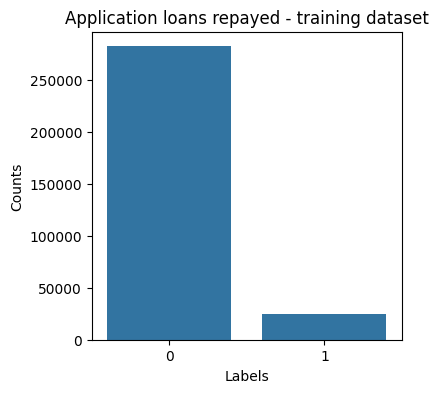

In [284]:
temp = train_data['TARGET'].value_counts()
df = pd.DataFrame({'Labels': temp.index,
                   'Counts': temp.values
                  })

plt.figure(figsize = (4,4))
plt.title('Application loans repayed - training dataset')
sns.barplot(x='Labels', y='Counts', data=df)
locs, labels = plt.xticks()
plt.show()

## Column Types

In [285]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [286]:
# Jumlah nilai unik pada setiap kolom yang memiliki tipe float64
train_data.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [287]:
# Jumlah nilai unik pada setiap kolom yang memiliki tipe int64
train_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [288]:
# Jumlah nilai unik pada setiap kolom yang memiliki tipe object
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [289]:
#Melihat nilai unik dari setiap kolom yang memiliki tipe object
for column in list(train_data.columns):
    if train_data[column].dtypes == 'object':
      print(f"Nilai unik kolom {column}:", train_data[column].unique())

Nilai unik kolom NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Nilai unik kolom CODE_GENDER: ['M' 'F' 'XNA']
Nilai unik kolom FLAG_OWN_CAR: ['N' 'Y']
Nilai unik kolom FLAG_OWN_REALTY: ['Y' 'N']
Nilai unik kolom NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Nilai unik kolom NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Nilai unik kolom NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Nilai unik kolom NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Nilai unik kolom NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Nilai unik kolom OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Dri

## Find Correlation

In [290]:
# Find correlations with the target and sort
correlations = train_data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:')
print(correlations.tail(15))
print('--------------------------------')
print('Most Negative Correlations:')
print(correlations.head(15))

Most Positive Correlations:
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------------
Most Negative Correlations:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS

## Missing Values

In [291]:
miss_data = pd.DataFrame(train_data.isnull().sum(), columns=['Total'])
miss_data['Percentage'] = (miss_data['Total'] / train_data.shape[0]) * 100
miss_data.sort_values(by=['Percentage'], ascending=False).reset_index().head(10)

,index,Total,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


In [292]:
# Drop kolom yang memiliki nilai NaN > 50%
train_data.drop(train_data.iloc[:, 44:91], inplace=True, axis=1)

## ```CODE_GENDER``` value distribution

In [293]:
train_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [294]:
df = train_data.groupby(by=['CODE_GENDER', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
df.reset_index(drop=True)

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [295]:
# Drop baris yang memiliki nilai XNA pada kolom CODE_GENDER
train_data.drop(train_data[train_data['CODE_GENDER'] == 'XNA'].index, inplace=True)

train_data['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

## ```NAME_INCOME_TYPE``` value distribution

In [296]:
train_data['NAME_INCOME_TYPE'].value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [297]:
df = train_data.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
df.reset_index(drop=True)

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Businessman,0,10
1,Commercial associate,0,66256
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


## ```NAME_FAMILY_STATUS``` value distribution

In [298]:
train_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [299]:
df = train_data.groupby(by=['NAME_FAMILY_STATUS', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
df.reset_index(drop=True)

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,0,26813
1,Civil marriage,1,2961
2,Married,0,181579
3,Married,1,14850
4,Separated,0,18150
5,Separated,1,1620
6,Single / not married,0,40987
7,Single / not married,1,4457
8,Unknown,0,2
9,Widow,0,15151


In [300]:
# Drop baris yang memiliki nilai Unknown pada kolom NAME_FAMILY_STATUS
train_data.drop(train_data[train_data['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace=True)

train_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

## ```OCCUPATION_TYPE``` value distribution

In [301]:
print('NaN Value:', train_data['OCCUPATION_TYPE'].isna().sum())
train_data['OCCUPATION_TYPE'].value_counts()

NaN Value: 96389


Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [302]:
train_data['OCCUPATION_TYPE'].fillna(train_data['OCCUPATION_TYPE'].mode()[0], inplace=True)

## ```NAME_TYPE_SUITE``` value distribution

In [303]:
print('NaN Value:', train_data['NAME_TYPE_SUITE'].isna().sum())
train_data['NAME_TYPE_SUITE'].value_counts()

NaN Value: 1290


Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [304]:
train_data['NAME_TYPE_SUITE'].fillna(train_data['NAME_TYPE_SUITE'].mode()[0], inplace=True)

## ```OWN_CAR_AGE``` value distribution

In [305]:
print('NaN Value:', train_data['OWN_CAR_AGE'].isna().sum())
train_data['OWN_CAR_AGE'].describe()

NaN Value: 202925


count    104580.000000
mean         12.061121
std          11.944919
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [306]:
df = train_data.groupby(by=['FLAG_OWN_CAR', 'TARGET'], as_index=False)['OWN_CAR_AGE'].mean()
df.reset_index(drop=True)

,FLAG_OWN_CAR,TARGET,OWN_CAR_AGE
0,N,0,NaN
1,N,1,NaN
2,Y,0,11.935570
3,Y,1,13.668691


In [307]:
# Ganti nilai NaN dengan 0
train_data['OWN_CAR_AGE'].fillna(0, inplace=True)

## ```DAYS_``` columns

In [308]:
df = train_data[['DAYS_REGISTRATION',
                       'DAYS_LAST_PHONE_CHANGE',
                       'DAYS_BIRTH',
                       'DAYS_EMPLOYED',
                       'DAYS_ID_PUBLISH',
                       'TARGET'
                       ]]

df.describe()

,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,TARGET
count,307505.000000,307504.000000,307505.000000,307505.000000,307505.000000,307505.000000
mean,-4986.147994,-962.861833,-16037.049495,63816.348794,-2994.201437,0.080730
std,3522.887818,826.813977,4363.987877,141276.836143,1509.454886,0.272421
min,-24672.000000,-4292.000000,-25229.000000,-17912.000000,-7197.000000,0.000000
25%,-7480.000000,-1570.000000,-19682.000000,-2760.000000,-4299.000000,0.000000
50%,-4504.000000,-757.000000,-15750.000000,-1213.000000,-3254.000000,0.000000
75%,-2010.000000,-274.000000,-12413.000000,-289.000000,-1720.000000,0.000000
max,0.000000,0.000000,-7489.000000,365243.000000,0.000000,1.000000


In [309]:
df['AGE'] = train_data['DAYS_BIRTH'] / -365
df.AGE.describe()

count    307505.000000
mean         43.937122
std          11.956131
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [310]:
labels = ['10-19', '20-29', '30-39', '40-49',
         '50-59', '60-69', '70-79']

df['AGE_GROUP'] = pd.cut(df['AGE'], [10,20,30,40,50,60,70,80], right=False, labels=labels)
df.AGE_GROUP.value_counts()

30-39    82296
40-49    76543
50-59    68073
20-29    44998
60-69    35595
10-19        0
70-79        0
Name: AGE_GROUP, dtype: int64

In [311]:
df.groupby(by=['AGE_GROUP', 'TARGET'], as_index=False)['AGE'].count()

,AGE_GROUP,TARGET,AGE
0,10-19,0,0
1,10-19,1,0
2,20-29,0,39843
3,20-29,1,5155
4,30-39,0,74411
5,30-39,1,7885
6,40-49,0,70683
7,40-49,1,5860
8,50-59,0,63900
9,50-59,1,4173


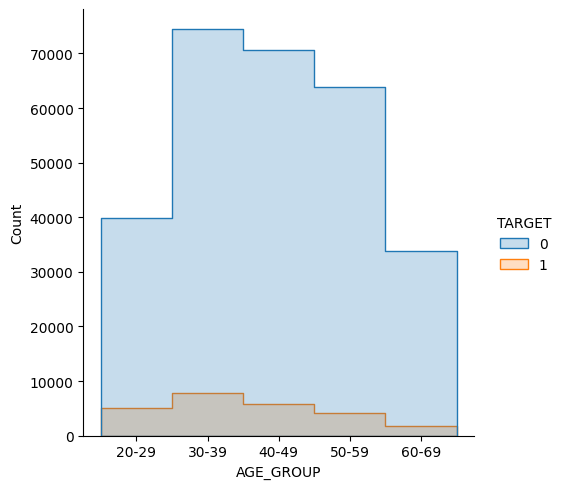

In [312]:
sns.displot(df, x="AGE_GROUP", hue="TARGET", element="step")

In [313]:
(train_data['DAYS_EMPLOYED'] / -365).describe()

count    307505.000000
mean       -174.839312
std         387.059825
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [314]:
train_data['DAYS_EMPLOYED'].value_counts().sort_values(ascending=False)

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-12995         1
-10754         1
-16103         1
-10678         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [315]:
df = train_data[train_data['DAYS_EMPLOYED'] == 365243]

print(df.shape)
df.groupby(by=['TARGET'], as_index=False)['SK_ID_CURR'].count().reset_index(drop=True)

(55374, 75)


,TARGET,SK_ID_CURR
0,0,52384
1,1,2990


In [316]:
df.groupby(by=['NAME_INCOME_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count().reset_index(drop=True)

,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Pensioner,0,52370
1,Pensioner,1,2982
2,Unemployed,0,14
3,Unemployed,1,8


In [317]:
# Replace the 365243 values with 0
train_data['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

train_data['DAYS_EMPLOYED'].describe()

count    307505.000000
mean      -1954.828526
std        2307.041798
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

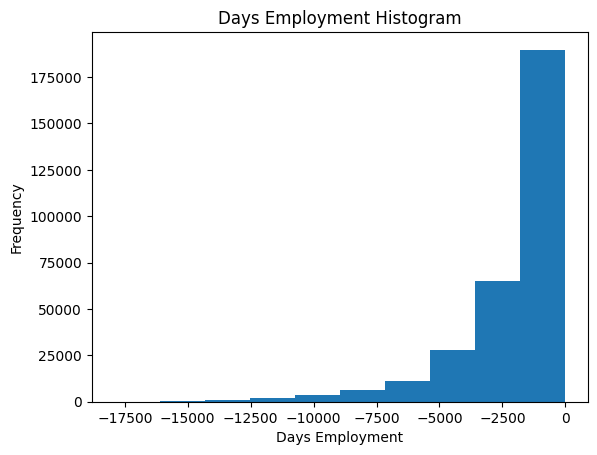

In [318]:
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

## ```EXT_SOURCE_``` columns

In [319]:
df = train_data[['EXT_SOURCE_1',
                 'EXT_SOURCE_2',
                 'EXT_SOURCE_3',
                 'TARGET'
                 ]]

df.describe()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
count,134130.000000,3.068450e+05,246541.000000,307505.000000
mean,0.502128,5.143908e-01,0.510856,0.080730
std,0.211064,1.910605e-01,0.194843,0.272421
min,0.014568,8.173617e-08,0.000527,0.000000
25%,0.334007,3.924574e-01,0.370650,0.000000
50%,0.505996,5.659561e-01,0.535276,0.000000
75%,0.675060,6.636171e-01,0.669057,0.000000
max,0.962693,8.549997e-01,0.896010,1.000000


In [320]:
df = df.corr()['TARGET']
df

EXT_SOURCE_1   -0.155316
EXT_SOURCE_2   -0.160470
EXT_SOURCE_3   -0.178926
TARGET          1.000000
Name: TARGET, dtype: float64

In [321]:
train_data['EXT_SOURCE_1'].fillna(train_data['EXT_SOURCE_1'].median(), inplace=True)
train_data['EXT_SOURCE_2'].fillna(train_data['EXT_SOURCE_2'].median(), inplace=True)
train_data['EXT_SOURCE_3'].fillna(train_data['EXT_SOURCE_3'].median(), inplace=True)

## ```FLAG_DOCUMENT_``` columns

In [322]:
train_data['FLAG_DOCUMENT_SUM'] = (train_data['FLAG_DOCUMENT_2'] + train_data['FLAG_DOCUMENT_3'] + train_data['FLAG_DOCUMENT_4'] +
                                   train_data['FLAG_DOCUMENT_5'] + train_data['FLAG_DOCUMENT_6'] + train_data['FLAG_DOCUMENT_7'] +
                                   train_data['FLAG_DOCUMENT_8'] + train_data['FLAG_DOCUMENT_9'] + train_data['FLAG_DOCUMENT_10'] +
                                   train_data['FLAG_DOCUMENT_11'] + train_data['FLAG_DOCUMENT_12'] + train_data['FLAG_DOCUMENT_13'] +
                                   train_data['FLAG_DOCUMENT_14'] + train_data['FLAG_DOCUMENT_15'] + train_data['FLAG_DOCUMENT_16'] +
                                   train_data['FLAG_DOCUMENT_17'] + train_data['FLAG_DOCUMENT_18'] + train_data['FLAG_DOCUMENT_19'] +
                                   train_data['FLAG_DOCUMENT_20'] + train_data['FLAG_DOCUMENT_21']
                                   )

train_data['FLAG_DOCUMENT_SUM'].describe()

count    307505.000000
mean          0.930167
std           0.344282
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: FLAG_DOCUMENT_SUM, dtype: float64

In [323]:
# Drop kolom FLAG_DOCUMENT 2-21
train_data.drop(train_data.iloc[:, 49:69], inplace=True, axis=1)

## Missing Values Pt. 2

In [324]:
miss_data = pd.DataFrame(train_data.isnull().sum(), columns=['Total'])
miss_data['Percentage'] = (miss_data['Total'] / train_data.shape[0]) * 100
miss_data.sort_values(by=['Percentage'], ascending=False).reset_index().head(15)

,index,Total,Percentage
0,AMT_REQ_CREDIT_BUREAU_YEAR,41518,13.501569
1,AMT_REQ_CREDIT_BUREAU_QRT,41518,13.501569
2,AMT_REQ_CREDIT_BUREAU_MON,41518,13.501569
3,AMT_REQ_CREDIT_BUREAU_WEEK,41518,13.501569
4,AMT_REQ_CREDIT_BUREAU_DAY,41518,13.501569
5,AMT_REQ_CREDIT_BUREAU_HOUR,41518,13.501569
6,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332027
7,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332027
8,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332027
9,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332027


In [325]:
train_data['DAYS_LAST_PHONE_CHANGE'].fillna(train_data['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)
train_data.fillna(0, inplace=True)

In [326]:
# numeric_col = train_data.select_dtypes(include=['int64','float64']).columns.tolist()

# for column in train_data:
#     if train_data[column].isnull().any():
#         if(column in numeric_col):
#             train_data[column] = train_data[column].fillna(train_data[column].median())

# Label Encoding

In [327]:
train = train_data.copy()
train.drop(['SK_ID_CURR'], inplace=True, axis=1)
print('Jumlah duplikasi data:', train.duplicated().sum())

Jumlah duplikasi data: 0


In [328]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

4 columns were label encoded.


In [329]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)

print('Training Features shape: ', train.shape)

Training Features shape:  (307505, 161)


# MinMaxScaler

In [330]:
#Mendapatkan kolom numerik dengan nilai maks > 1 untuk diterapkan MinMaxScaler
column_to_scale = [column for column in train if train[column].max() > 1]

scaler = MinMaxScaler()

# Menerapkan Min-Max Scaling pada column_to_scale
train[column_to_scale] = scaler.fit_transform(train[column_to_scale])

# Data Splitting

In [331]:
# Membagi dataset train ke dalam dua dataset X(feature) dan Y(target)
X = train.drop(['TARGET'], axis=1)
print('Baris dan kolom data X:', X.shape)
y = train['TARGET']
print('Baris dan kolom data Y:', y.shape)

# Membagi dataset ke dalam train set and test set
# 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Baris dan kolom data X_train:', X_train.shape)
print('Baris dan kolom data X_test:', X_test.shape)
print('Baris dan kolom data y_train:', y_train.shape)
print('Baris dan kolom data y_test:', y_test.shape)

Baris dan kolom data X: (307505, 160)
Baris dan kolom data Y: (307505,)
Baris dan kolom data X_train: (230628, 160)
Baris dan kolom data X_test: (76877, 160)
Baris dan kolom data y_train: (230628,)
Baris dan kolom data y_test: (76877,)


In [332]:
y_train.value_counts()

0    212011
1     18617
Name: TARGET, dtype: int64

In [333]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5)
X_train, y_train = smote.fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
0    212011
1    106005
Name: TARGET, dtype: int64


# Logistic Regression Model

In [334]:
model_log_reg = LogisticRegression().fit(X_train, y_train)

In [335]:
# Prediksi X_train
y_train_predict_log_reg = model_log_reg.predict(X_train)

# Print classification report
print('Classification Reports dari Training Model Logistic Regression:')
print(classification_report(y_train, y_train_predict_log_reg))

#Print confusion matrix
print('Confusion Matrix dari Training Model Logistic Regression:')
print(confusion_matrix(y_train, y_train_predict_log_reg))

Classification Reports dari Training Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89    212011
           1       0.84      0.65      0.74    106005

    accuracy                           0.84    318016
   macro avg       0.84      0.80      0.81    318016
weighted avg       0.84      0.84      0.84    318016

Confusion Matrix dari Training Model Logistic Regression:
[[199240  12771]
 [ 36619  69386]]


In [336]:
#Prediksi data X_test
y_test_predict_log_reg = model_log_reg.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Logistic Regression:')
print(classification_report(y_test, y_test_predict_log_reg))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Logistic Regression:')
print(confusion_matrix(y_test, y_test_predict_log_reg))

Classification Reports dari Testing Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     70669
           1       0.08      0.06      0.07      6208

    accuracy                           0.87     76877
   macro avg       0.50      0.50      0.50     76877
weighted avg       0.85      0.87      0.86     76877

Confusion Matrix dari Testing Model Logistic Regression:
[[66323  4346]
 [ 5818   390]]


In [337]:
# Tes Akurasi Model
acc_log_train= round(model_log_reg.score(X_train,y_train)*100, 2)
acc_log_test= round(model_log_reg.score(X_test,y_test)*100, 2)

print('Akurasi Training Model Logistic Regression:', acc_log_train)
print('Akurasi Testing Model Logistic Regression:', acc_log_test)

Akurasi Training Model Logistic Regression: 84.47
Akurasi Testing Model Logistic Regression: 86.78


In [338]:
# ROC score
roc_auc_log = round(roc_auc_score(y_test, y_test_predict_log_reg),4)
print('ROC AUC Model Logistic Regression:', roc_auc_log)

ROC AUC Model Logistic Regression: 0.5007


# Decision Tree Model

In [339]:
model_dt = DecisionTreeClassifier().fit(X_train,y_train)

In [340]:
# Prediksi X_train
y_train_predict_dt = model_dt.predict(X_train)

# Print classification report
print('Classification Reports dari Training Model Decision Tree:')
print(classification_report(y_train, y_train_predict_dt))

#Print confusion matrix
print('Confusion Matrix dari Training Model Decision Tree:')
print(confusion_matrix(y_train, y_train_predict_dt))

Classification Reports dari Training Model Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212011
           1       1.00      1.00      1.00    106005

    accuracy                           1.00    318016
   macro avg       1.00      1.00      1.00    318016
weighted avg       1.00      1.00      1.00    318016

Confusion Matrix dari Training Model Decision Tree:
[[212011      0]
 [     0 106005]]


In [341]:
#Prediksi data X_test
y_test_predict_dt = model_dt.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Decision Tree:')
print(classification_report(y_test, y_test_predict_dt))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Decision Tree:')
print(confusion_matrix(y_test, y_test_predict_dt))

Classification Reports dari Testing Model Decision Tree:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     70669
           1       0.13      0.17      0.15      6208

    accuracy                           0.84     76877
   macro avg       0.53      0.53      0.53     76877
weighted avg       0.86      0.84      0.85     76877

Confusion Matrix dari Testing Model Decision Tree:
[[63707  6962]
 [ 5171  1037]]


In [342]:
# Tes Akurasi Model
acc_dt_train= round(model_dt.score(X_train,y_train)*100, 2)
acc_dt_test= round(model_dt.score(X_test,y_test)*100, 2)

print('Akurasi Training Model Decision Tree:', acc_dt_train)
print('Akurasi Testing Model Decision Tree:', acc_dt_test)

Akurasi Training Model Decision Tree: 100.0
Akurasi Testing Model Decision Tree: 84.22


In [343]:
# ROC score
roc_auc_dt = round(roc_auc_score(y_test, y_test_predict_dt),4)
print('ROC AUC Model Decision Tree:', roc_auc_dt)

ROC AUC Model Decision Tree: 0.5343


# Random Forest Model

In [344]:
model_rf = RandomForestClassifier().fit(X_train, y_train)

In [345]:
# Prediksi X_train
y_train_predict_rf = model_rf.predict(X_train)

# Print classification report
print('Classification Reports dari Training Model Random Forest:')
print(classification_report(y_train, y_train_predict_rf))

#Print confusion matrix
print('Confusion Matrix dari Training Model Random Forest:')
print(confusion_matrix(y_train, y_train_predict_rf))

Classification Reports dari Training Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212011
           1       1.00      1.00      1.00    106005

    accuracy                           1.00    318016
   macro avg       1.00      1.00      1.00    318016
weighted avg       1.00      1.00      1.00    318016

Confusion Matrix dari Training Model Random Forest:
[[212011      0]
 [     4 106001]]


In [346]:
#Prediksi data X_test
y_test_predict_rf = model_rf.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Random Forest:')
print(classification_report(y_test, y_test_predict_rf))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Random Forest:')
print(confusion_matrix(y_test, y_test_predict_rf))

Classification Reports dari Testing Model Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70669
           1       0.75      0.00      0.00      6208

    accuracy                           0.92     76877
   macro avg       0.83      0.50      0.48     76877
weighted avg       0.91      0.92      0.88     76877

Confusion Matrix dari Testing Model Random Forest:
[[70668     1]
 [ 6205     3]]


In [347]:
# Tes Akurasi Model
acc_rf_train= round(model_rf.score(X_train,y_train)*100, 2)
acc_rf_test= round(model_rf.score(X_test,y_test)*100, 2)

print('Akurasi Training Model Random Forest:', acc_rf_train)
print('Akurasi Testing Model Random Forest:', acc_rf_test)

Akurasi Training Model Random Forest: 100.0
Akurasi Testing Model Random Forest: 91.93


In [348]:
# ROC score
roc_auc_rf = round(roc_auc_score(y_test, y_test_predict_rf),4)
print('ROC AUC Model Random Forest:', roc_auc_rf)

ROC AUC Model Random Forest: 0.5002


# Model Selection

In [349]:
results = pd.DataFrame({
    "Models": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Training Accuracy Score": [86.69, 100.0, 100.0],
    "Testing Accuracy Score": [86.49, 84.19, 91.93],
    "ROC Score": [0.5259, 0.5362, 0.5002]
})

results.sort_values(by=['Testing Accuracy Score', 'ROC Score'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
2,Random Forest,100.00,91.93,0.5002
0,Logistic Regression,86.69,86.49,0.5259
1,Decision Tree,100.00,84.19,0.5362
